## testing out plotting bugs etc

In [2]:
import numpy as np
import os
import scipy.stats as sps

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import qp

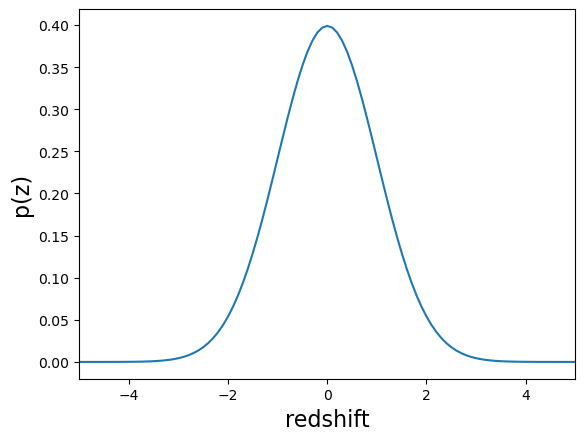

In [3]:
loc1 = np.array([[0]])
scale1 = np.array([[1]])
norm_dist1 = qp.stats.norm.create(loc=loc1, scale=scale1)
fig, axes = qp.plotting.plot_native(norm_dist1, xlim=(-5., 5.))

In [4]:
xvals = np.linspace(-5, 5, 101)

In [6]:
# Define the quantile values to compute the locations for
quants = np.linspace(0.0, 1, 7)
print(quants)

# Compute the corresponding locations using the inverse CDF (percent point function)
locs = np.squeeze(norm_dist1.ppf(quants))  # Ensure locs is 1D

# Construct the quantile distribution
quant_dist = qp.quant.create(quants=quants, locs=locs)
quant_vals = quant_dist.pdf(xvals)
print("The input and output shapes are:", xvals.shape, quant_vals.shape)
print(locs)
print(quants)

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
The input and output shapes are: (101,) (101,)
[       -inf -0.96742157 -0.4307273   0.          0.4307273   0.96742157
         inf]
[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]


/home/jscora/code/desc-rail/forked/qp/src/qp/parameterizations/quant/piecewise_linear.py:45: RuntimeWarning: invalid value encountered in subtract
  self._adjusted_locations = self._locations[:, 1:] - np.diff(self._locations) / 2


piecewise_constant
-2.411160527736016
-2.3263478740408408
-0.941074530352976
-0.4215776353171568
0.0
0.4215776353171568
0.941074530352976
2.3263478740408408
2.4111605277360164


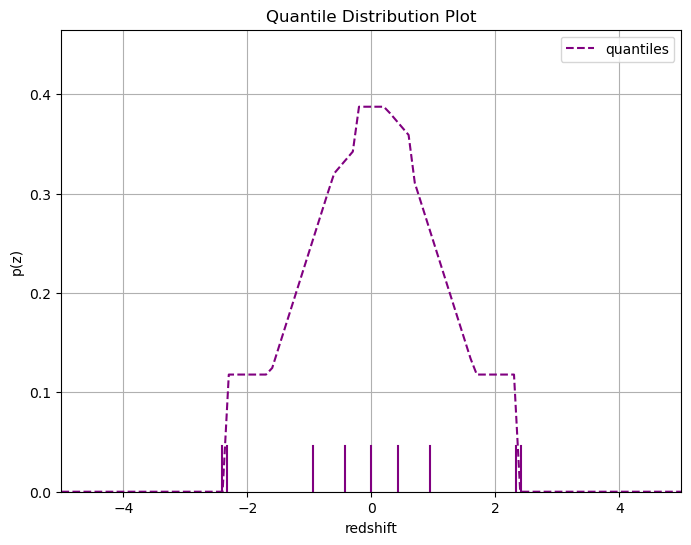

In [70]:
# Construct a single PDF for plotting without changing the shape of locs
quant_dist1 = qp.quant(quants=np.atleast_1d(quants), locs=np.atleast_2d(locs))
#quant_dist1.dist.pdf_constructor_name = 'piecewise_linear'
quant_dist1.dist.pdf_constructor_name = 'piecewise_constant'
#quant_dist1.dist.pdf_constructor_name = 'cdf_spline_derivative'
#quant_dist1.dist.pdf_constructor_name = 'dual_spline_average'
print(quant_dist1.dist.pdf_constructor_name)
quant_dist1.dist.quants
# PDF and CDF values
pdf_vals = np.squeeze(quant_dist1.pdf(xvals))
cdf_vals = np.squeeze(quant_dist1.cdf(xvals))

# Now, replace the plot_native call with Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the quantiles as vertical lines (ensure locs are scalar values)
#print(locs)
for loc in quant_dist1.dist.locs[0]:
    print(loc)
    ax.axvline(x=loc, ymin=0, ymax=0.1, color='purple', label='quantiles')

# Plot PDF with dashed line
ax.plot(xvals, pdf_vals, label="quantiles", color='purple', linestyle='--')

# Customize the plot
ax.set_xlim(-5., 5.)
ax.set_ylim(0, max(pdf_vals) * 1.2)  # Adjust y-limits for better viewing
ax.set_title('Quantile Distribution Plot')
ax.set_xlabel('redshift')
ax.set_ylabel('p(z)')
ax.grid(True)

# Add legend (ensure no duplicate labels)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Show the plot
plt.show()

In [71]:
print(quant_dist1.dist.quants)
print(quant_dist1.dist.locs)

[0.         0.01       0.17333333 0.33666667 0.5        0.66333333
 0.82666667 0.99       1.        ]
[[-2.41116053 -2.32634787 -0.94107453 -0.42157764  0.          0.42157764
   0.94107453  2.32634787  2.41116053]]


In [72]:
print(quants)
print(locs)

[0.01       0.17333333 0.33666667 0.5        0.66333333 0.82666667
 0.99      ]
[-2.32634787 -0.94107453 -0.42157764  0.          0.42157764  0.94107453
  2.32634787]


In [73]:
quant_dist2 = qp.quant(quants=quants, locs=locs, pdf_constructor_name = 'dual_spline_average')
quant_dist2.pdf(xvals)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.00238202,  0.10110221,  0.1030145 ,  0.107908  ,
        0.11549745,  0.12549755,  0.13762304,  0.15158863,  0.16710905,
        0.18389903,  0.20167327,  0.22014651,  0.23903347,  0.25804886,
        0.27690742,  0.29532386,  0.31301291,  0.32968929,  0.34506771,
        0.35886291,  0.37078961,  0.38056252,  0.38789638,  0.39250589,
        0.39410579,  0.39250589,  0.38789638,  0.38056252,  0.37078961,
        0.35886291,  0.34506771,  0.32968929,  0.31301291,  0.29532386,
        0.27690742,  0.25804886,  0.23903347,  0.22014651,  0.20167327,
        0.18389903,  0.16710905,  0.15158863,  0.13762304,  0.12

[0.01       0.17333333 0.33666667 0.5        0.66333333 0.82666667
 0.99      ]
The input and output shapes are: (101,) (1, 101)
piecewise_linear
[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9  5. ]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.12342198 0.10667922 0.09359897 0.08418123
  0.078426   0.07633328 0.077903

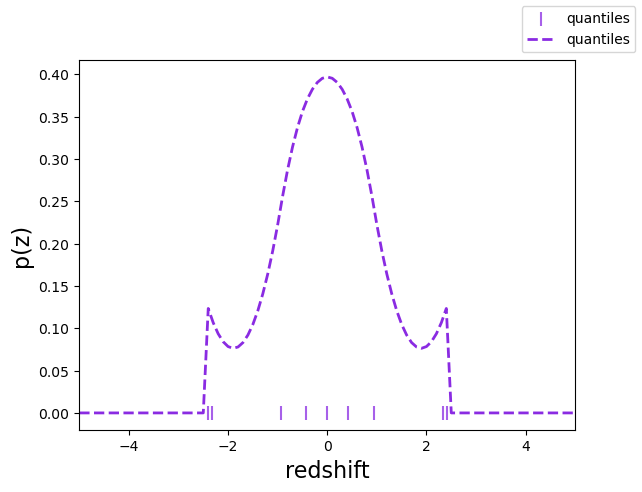

In [81]:
# Define the quantile values to compute the locations for
quants = np.linspace(0.01, 0.99, 7)
# quants = np.array([0.01, 0.30, 0.70, 0.99])
print(quants)
# Compute the corresponding locations
locs = norm_dist1.ppf(quants)
# Construct the distribution using the quantile value and locations
quant_dist = qp.quant(quants=quants, locs=locs)    # quant = quant_gen.create
quant_vals = quant_dist.pdf(xvals)
print("The input and output shapes are:", xvals.shape, quant_vals.shape)
# Construct a single PDF for plotting
quant_dist3 = qp.quant(quants=np.atleast_1d(quants), locs=np.atleast_2d(locs[0]))
print(quant_dist3.dist.pdf_constructor_name)
# quant_dist3.dist.pdf_constructor_name='piecewise_linear'
#quant_dist3.dist.pdf_constructor_name='piecewise_constant'
quant_dist3.dist.pdf_constructor_name='cdf_spline_derivative'
#quant_dist3.dist.pdf_constructor_name='dual_spline_average'
print(xvals)
print(quant_dist3.pdf(xvals))
print(quant_dist3.cdf(xvals))
fig, axes = qp.plotting.plot_native(quant_dist3, xlim=(-5., 5.), label="quantiles")
leg = fig.legend()

In [82]:
quant_dist3.pdf(xvals)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12342198, 0.10667922, 0.09359897, 0.08418123,
        0.078426  , 0.07633328, 0.07790307, 0.08313536, 0.09203017,
        0.10458748, 0.1208073 , 0.14068963, 0.16423447, 0.19144182,
        0.22231168, 0.25619083, 0.28733328, 0.31439465, 0.33737496,
        0.35627419, 0.37111194, 0.3824512 , 0.39055067, 0.39541036,
        0.39703025, 0.39541036, 0.39055067, 0.3824512 , 0.37111194,
        0.35627419, 0.33737496, 0.31439465, 0.28733328, 0.25619083,
        0.22231168, 0.19144182, 0.16423447, 0.14068963, 0.1208073 ,
        0.10458748, 0.09203017, 0.08313536, 0.07790307, 0.07633328,
        0.078426  , 0.08418123, 0.09359897, 0.10

[[-2.32634787 -0.94107453 -0.42157764  0.          0.42157764  0.94107453
   2.32634787]]
-2.3263478740408408
-0.941074530352976
-0.4215776353171568
0.0
0.4215776353171568
0.941074530352976
2.3263478740408408


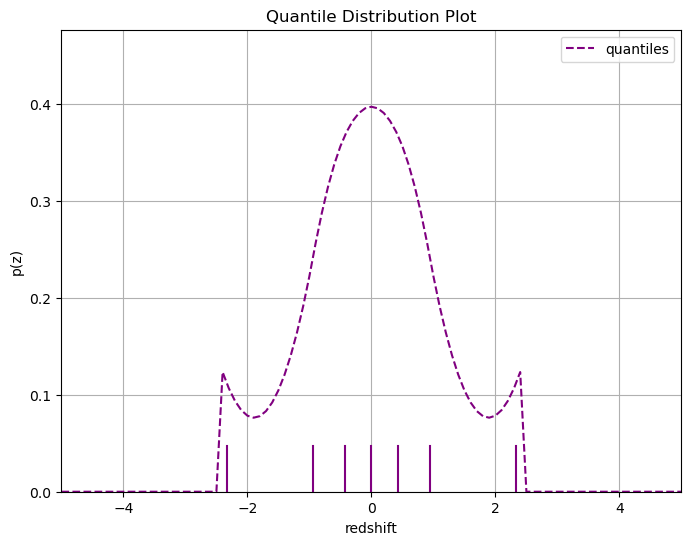

In [83]:
# PDF and CDF values
pdf_vals = np.squeeze(quant_dist3.pdf(xvals))
cdf_vals = np.squeeze(quant_dist3.cdf(xvals))

# Now, replace the plot_native call with Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the quantiles as vertical lines (ensure locs are scalar values)
print(locs)
for loc in locs[0]:
    print(loc)
    ax.axvline(x=loc, ymin=0, ymax=0.1, color='purple', label='quantiles')

# Plot PDF with dashed line
ax.plot(xvals, pdf_vals, label="quantiles", color='purple', linestyle='--')

# Customize the plot
ax.set_xlim(-5., 5.)
ax.set_ylim(0, max(pdf_vals) * 1.2)  # Adjust y-limits for better viewing
ax.set_title('Quantile Distribution Plot')
ax.set_xlabel('redshift')
ax.set_ylabel('p(z)')
ax.grid(True)

# Add legend (ensure no duplicate labels)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Show the plot
plt.show()

In [49]:
# Define the quantile values to compute the locations for
quants = np.linspace(0.001, 0.999, 16)
print(quants)

# Compute the corresponding locations using the inverse CDF (percent point function)
locs = norm_dist1.ppf(quants)  # Ensure locs is 1D
print(locs)

[0.001      0.06753333 0.13406667 0.2006     0.26713333 0.33366667
 0.4002     0.46673333 0.53326667 0.5998     0.66633333 0.73286667
 0.7994     0.86593333 0.93246667 0.999     ]
[[-3.09023231 -1.49441698 -1.10737152 -0.83948001 -0.62150612 -0.42981072
  -0.25282946 -0.08348404  0.08348404  0.25282946  0.42981072  0.62150612
   0.83948001  1.10737152  1.49441698  3.09023231]]


In [11]:
np.squeeze(locs)

array([-2.32634787, -0.65883769,  0.        ,  0.65883769,  2.32634787])

In [12]:
locs[0]

array([-2.32634787, -0.65883769,  0.        ,  0.65883769,  2.32634787])

In [50]:
data_dict = {"quants": quants, "locs": locs, "pdf_constructor_name":'dual_spline_average'}
quant_dist3 = qp.Ensemble(qp.quant,data_dict)

In [51]:
print(quants)
print(locs)

[0.001      0.06753333 0.13406667 0.2006     0.26713333 0.33366667
 0.4002     0.46673333 0.53326667 0.5998     0.66633333 0.73286667
 0.7994     0.86593333 0.93246667 0.999     ]
[[-3.09023231 -1.49441698 -1.10737152 -0.83948001 -0.62150612 -0.42981072
  -0.25282946 -0.08348404  0.08348404  0.25282946  0.42981072  0.62150612
   0.83948001  1.10737152  1.49441698  3.09023231]]


[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9  5. ]


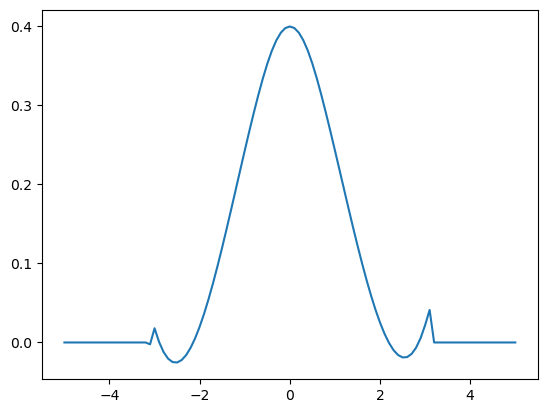

In [52]:
xvals_new = np.linspace(-5,5, 101)
yvals_3 = quant_dist3.pdf(xvals_new)
plt.plot(xvals_new,yvals_3[0])
print(xvals_new)

## Testing quantile parameterization notebook

In [19]:
# Sets the x axis limits on all plots, rerun notebook to apply changes.
STD_X_LIM = (0,5)

In [20]:
# Create an Ensemble with a single normal distribution
single_norm = qp.Ensemble(qp.stats.norm, data=dict(loc=3, scale=0.5))

# Starting with a simple base case. Reasonable quantiles >0, <1.0
single_norm_quantiles = np.linspace(0.001, 0.999, 16)
single_norm_locations = single_norm.ppf(single_norm_quantiles)

# Create a quantile parameterization ensemble
quant_dist_single_norm = qp.quant(quants=single_norm_quantiles, locs=single_norm_locations)

In [21]:
# Print out the constructor name
print(quant_dist_single_norm.dist.pdf_constructor_name)

piecewise_linear


In [22]:
quant_dist_single_norm = qp.Ensemble(
    qp.quant,
    data=dict(
        quants=single_norm_quantiles,
        locs=single_norm_locations,
        check_input=False,
        pdf_constructor_name='dual_spline_average'  # <-- This is the magic line
    )
)

# You can subsequently verify the reconstruction algorithm being used.
print(quant_dist_single_norm.dist.pdf_constructor_name)

# The pdf reconstruction algorithm can be redefined after the Ensemble has been created like so:
quant_dist_single_norm.dist.pdf_constructor_name='cdf_spline_derivative'
print(quant_dist_single_norm.dist.pdf_constructor_name)

dual_spline_average
cdf_spline_derivative


In [24]:
# Create an Ensemble with 3 normal distributions
means = np.array([[1], [2.5], [3]])
scales = np.array([[0.25], [0.5], [0.1]])
many_norm = qp.Ensemble(qp.stats.norm, data=dict(loc=means, scale=scales))

# Starting with a simple base case. Reasonable quantiles >0, <1.0
many_norm_quantiles = np.linspace(0.001, 0.999, 16)
many_norm_locations = many_norm.ppf(many_norm_quantiles)

# Create a quantile parameterization ensemble
quant_dist_many_norm = qp.quant(quants=many_norm_quantiles, locs=many_norm_locations)

# The following approach is identical, and is basically syntactical sugar.
quant_dist_many_norm = qp.convert(many_norm, 'quant', quants=many_norm_quantiles)

In [25]:
# Create a grid and call `pdf` to return the y values to reconstruct the initial PDF
user_provided_grid = np.linspace(0,4,100)
results = quant_dist_many_norm.pdf(user_provided_grid)
print(results.shape)

(3, 100)


In [26]:
# Use the following syntax to retrieve a specific distribution's PDF from the Ensemble
results = quant_dist_many_norm[1].pdf(user_provided_grid)
print(results.shape)

(1, 100)


In [27]:
user_provided_row = [0]
result_1 = quant_dist_many_norm.dist.pdf_constructor.construct_pdf(grid=user_provided_grid, row=user_provided_row)

user_provided_row = [1]
result_2 = quant_dist_many_norm.dist.pdf_constructor.construct_pdf(grid=user_provided_grid, row=user_provided_row)

# Expect that this will be non-zero
print(np.sum(result_1 - result_2))

-0.0013562400032666594


In [28]:
user_provided_rows = [[0,1]]
results = quant_dist_many_norm.dist.pdf_constructor.construct_pdf(grid=user_provided_grid, row=user_provided_rows)

# Expect this to be (2,100), but the `.ravel()` function in the piecewise_*
# constructors convert the results of interpolation into an array with shape = (2*100,)...
print(results.shape)

(200,)


Text(0.5, 1.0, 'Single selected distribution from Ensemble of quantile parameterization')

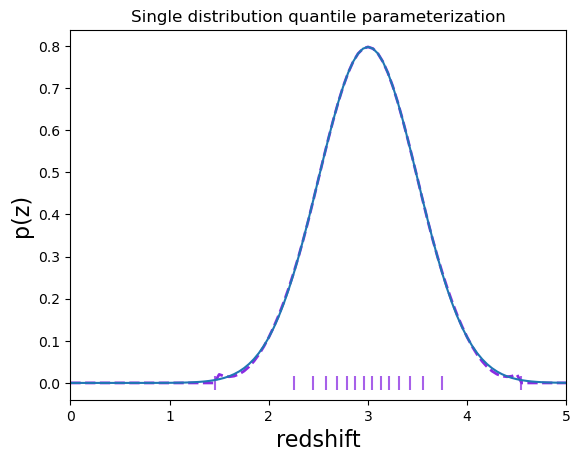

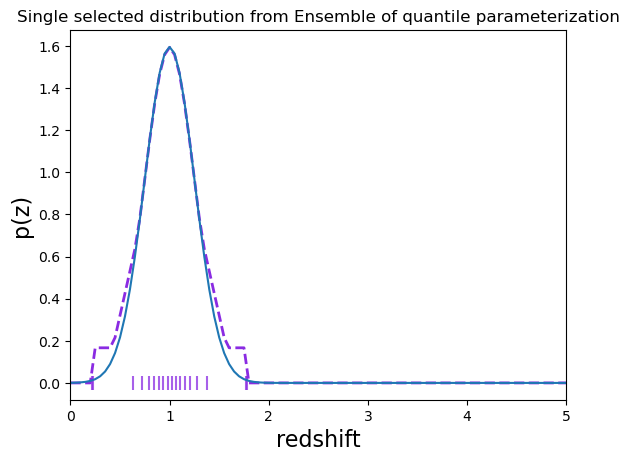

In [29]:
# Show basic plotting
_, ax1 = qp.plotting.plot_native(quant_dist_single_norm, xlim=STD_X_LIM)
qp.plotting.plot_native(single_norm, axes=ax1)
ax1.set_title('Single distribution quantile parameterization')

plot_index = 0
_, ax2 = qp.plotting.plot_native(quant_dist_many_norm[plot_index], xlim=STD_X_LIM)
qp.plotting.plot_native(many_norm[plot_index], axes=ax2)
ax2.set_title('Single selected distribution from Ensemble of quantile parameterization')

Text(0.5, 1.0, 'Original simple Gaussian distribution')

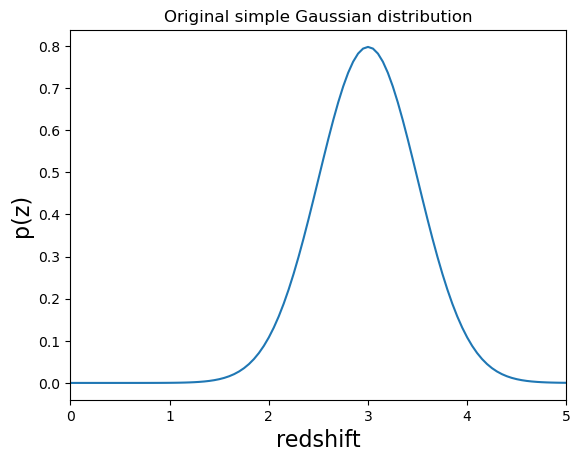

In [30]:
# Same as the single_norm Ensemble created at the beginning of the notebook.
single_norm = qp.Ensemble(qp.stats.norm, data=dict(loc=3, scale=0.5))
fig, ax = qp.plotting.plot_native(single_norm, xlim=STD_X_LIM)
ax.set_title('Original simple Gaussian distribution')

In [31]:
# Define the quantiles, extract the locations from the original distribution
single_norm_quantiles = np.linspace(0.001, 0.999, 16)
single_norm_locations = single_norm.ppf(single_norm_quantiles)

# Create a quantile parameterization ensemble
quant_dist_single_norm = qp.quant(quants=single_norm_quantiles, locs=single_norm_locations)

Text(0.5, 1.0, 'dual_spline_average')

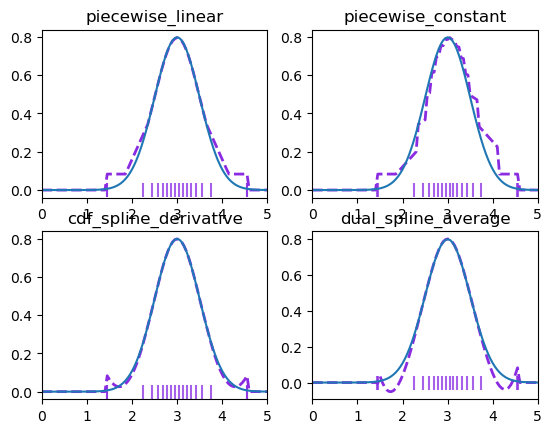

In [32]:
fig, ax = plt.subplots(2,2)
plt.setp(ax, xlim=STD_X_LIM)

quant_dist_single_norm.dist.pdf_constructor_name = 'piecewise_linear' # Will emit a logger warning that this constructor is already selected
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[0,0])
qp.plotting.plot_native(single_norm, axes=ax[0,0])


quant_dist_single_norm.dist.pdf_constructor_name = 'piecewise_constant'
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[0,1])
qp.plotting.plot_native(single_norm, axes=ax[0,1])


quant_dist_single_norm.dist.pdf_constructor_name = 'cdf_spline_derivative'
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[1,0])
qp.plotting.plot_native(single_norm, axes=ax[1,0])


quant_dist_single_norm.dist.pdf_constructor_name = 'dual_spline_average'
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[1,1])
qp.plotting.plot_native(single_norm, axes=ax[1,1])

ax[0,0].set_title('piecewise_linear')
ax[0,1].set_title('piecewise_constant')
ax[1,0].set_title('cdf_spline_derivative')
ax[1,1].set_title('dual_spline_average')

## Test data

In [3]:
qp.hist_gen.make_test_data()
cls_test_data = qp.hist_gen.test_data["hist"]
ens_h = qp.hist.create_ensemble(cls_test_data["ctor_data"])

In [4]:
ens_h.npdf

11

In [46]:
# testing out weird histograms

bins = np.linspace(-2,2,11)
print(bins)
pdfs = np.array([-0,-0.5,-1,-0.5,-0.5,-1.25,-1.5,-0.75,-0.5,-0.2])
data = {'bins': bins, 'pdfs': pdfs, 'check_input': False}
ens_h = qp.hist.create_ensemble(data)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]


In [41]:
ens_h.objdata()

{'pdfs': array([[-0.        ,  0.18656716,  0.37313433,  0.18656716,  0.18656716,
          0.46641791,  0.55970149,  0.27985075,  0.18656716,  0.07462687]])}

In [42]:
pdfs = ens_h.pdf(np.linspace(-3,3,21))

In [43]:
cdfs = ens_h.cdf(np.linspace(-1,1,21))

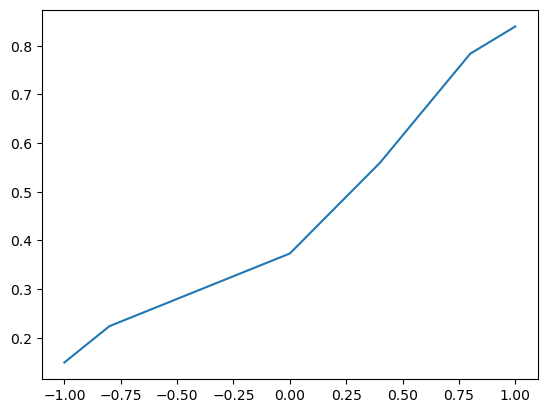

In [44]:
plt.plot(np.linspace(-1,1,21),cdfs)

In [32]:
ens_h.moment(2)

array([0.76835821])

In [63]:
dist = qp.hist_gen.create(**data)

In [69]:
dist.dist.pdfs

array([[-0.        ,  0.18656716,  0.37313433,  0.18656716,  0.18656716,
         0.46641791,  0.55970149,  0.27985075,  0.18656716,  0.07462687]])

AttributeError: 'rv_frozen_rows' object has no attribute 'objdata'